<a href="https://colab.research.google.com/github/efefew/python-tasks/blob/main/%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%BA_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

отклонение =  [1598.6401288]
отклонение =  [1195.63683737]
отклонение =  [1205.37266987]
отклонение =  [1208.27227721]
отклонение =  [1208.5280762]
отклонение =  [1208.60297371]
отклонение =  [1208.62961601]
отклонение =  [1208.64326732]
отклонение =  [1208.64326732]


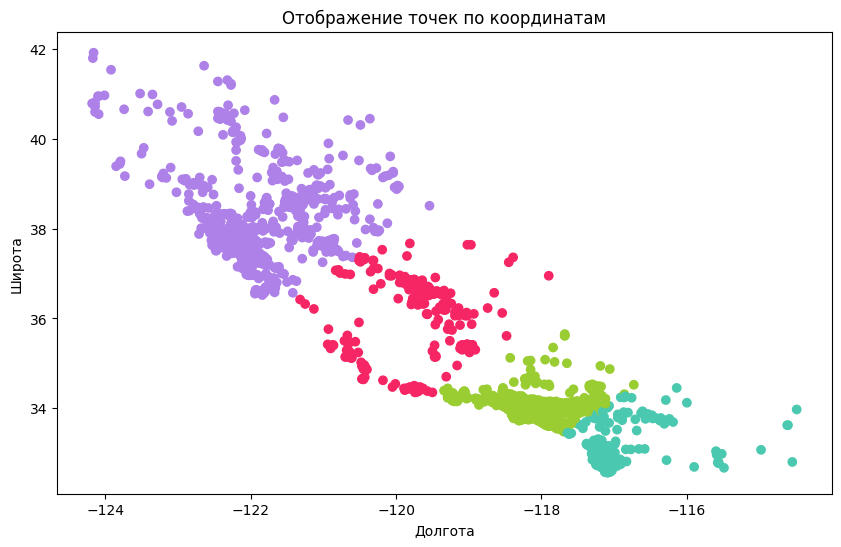

In [93]:
from unittest.util import _MAX_LENGTH
from email.policy import default
import matplotlib.pyplot as plt
from tkinter.tix import MAX
from math import sqrt
import pandas as pd
import random
import csv

#получить расстояние
def get_range(x1, y1, x2, y2):
  return max(x2 - x1,y2 - y1)#Расстояние Чебышева
  #return sqrt((x2 - x1)*(x2 - x1) + (y2 - y1)*(y2 - y1))#Евклидово расстояние
  #return abs(x2 - x1) + abs(y2 - y1)#манхэттенское расстояние

#получить индекс кластера с минимальным расстоянием до точки между центроидами кластеров
def get_id_min_range(centroids, x_point, y_point):
  min_range = _MAX_LENGTH
  id_claster = 0
  for x in range(len(centroids[0])):
      r = get_range(centroids[0][x], centroids[1][x], x_point, y_point)
      if min_range > r:
          min_range = r
          id_claster = x
  return id_claster

#получить цвет кластера, используя индекс
def get_color_claster(id):
  return  {
          id == 0: '#F62664FF',
          id == 1: '#AE81E9FF',
          id == 2: '#9ACD32FF',
          id == 3: '#4AC9B0FF',
          id == 4: '#272822FF'
          }[True]

#получить начальное значение центроидов
def get_start_centroids(clasters_count, arr_count, df):
  centroids = [[],[]]
  for x in range(clasters_count):
      random_id = random.randint(0,arr_count - 1)
      centroids[0].append( df['longitude'][random_id])
      centroids[1].append( df['latitude'][random_id])
  return centroids

#получить начальное значение маркеров кластеров
def get_start_claster_markers(arr_count, centroids, df):
  claster_markers = []
  for x in range(arr_count):
    claster_markers.append(get_id_min_range(centroids, df['longitude'][x],  df['latitude'][x]))
  return claster_markers

#рассчитать отклонение
def calculate_devation(centroids, claster_markers, df):
  count = len(claster_markers)
  summ = 0
  for x in range(count):
    value = get_range(centroids[0][claster_markers[x]], centroids[1][claster_markers[x]], df['longitude'][x],  df['latitude'][x])
    summ += value * value
  return summ

#вычислить новое положение центроида
def get_centroids(id_claster, claster_markers, df ):
  count = 0
  summ_x = 0
  summ_y = 0
  for x in range(len(claster_markers)):
    if claster_markers[x] == id_claster:
      count+= 1
      summ_x += df['longitude'][x]
      summ_y += df['latitude'][x]
  if(count == 0):
    random_id = random.randint(0,len(claster_markers) - 1)
    return [df['longitude'][random_id]],[df['latitude'][random_id]]
  return  [summ_x/count],[summ_y/count]

#алгоритм к-средних
def k_means_algorithm(clasters_count, color_arr, df):
  #задаём значение
  arr_count = len(color_arr)
  centroids = get_start_centroids(clasters_count, arr_count, df)
  claster_markers = get_start_claster_markers(arr_count, centroids, df)
  old_centroids = [[0 in range(clasters_count)],[0 in range(clasters_count)]]
  devation = calculate_devation(centroids, claster_markers, df)#отклонение
  min_delta = 0.00001#минимальная разница отклонений старого и нового
  old_devation = devation + min_delta + 1

  #не выходим из цикла пока разность между отклонениями не будет меньше минимальной разницы
  while abs(devation - old_devation) >= min_delta:
    old_devation = devation

    for x in range(clasters_count):
      centroids[0][x], centroids[1][x] = get_centroids(x, claster_markers, df )

    for x in range(arr_count):
      claster_markers[x] = get_id_min_range(centroids, df['longitude'][x],  df['latitude'][x])

    devation = calculate_devation(centroids, claster_markers, df)
    print('отклонение = ', devation)

  #задать списку цвет
  for x in range(arr_count):
    color_arr[x] = get_color_claster(get_id_min_range(centroids, df['longitude'][x],  df['latitude'][x]))


#создаём график
def graph():
  # Указываем размер графика
  plt.figure(figsize=(10, 6))
  # Построение точек на графике
  plt.scatter(df['longitude'], df['latitude'], c= color_arr, )
  # Добавление заголовка и подписей к осям
  plt.title('Отображение точек по координатам')
  plt.xlabel('Долгота')
  plt.ylabel('Широта')
  plt.show()

df = pd.read_csv('/content/sample_data/california_housing.csv')
color_arr = []
for x in range(len(df['longitude'])):
    color_arr.append('red')
k_means_algorithm(4, color_arr, df)
graph()
